In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
import datetime
import pylab

In [2]:
df1 = pd.read_csv('data/buckingham.csv', usecols=[1,5])

df1['TIME'] = pd.to_datetime(df1['TIME'])


start = pd.to_datetime(str(min(df1.TIME)))   # 2020-01-01 06:25:02. Data only reliable after 2020-01-26.
end = pd.to_datetime(str(max(df1.TIME)))     # 2020-04-01 23:55:02. 
start_date = start.date()
end_date = end.date()

t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


t_full=pd.array(pd.DatetimeIndex(df1.iloc[:,0]).astype(np.int64))/1000000000
df1['T']=(t_full-t_full[0])/60/60/24 # convert timestamp to days
df1['WEEKDAY'] = pd.to_datetime(df1['TIME'])
df1['WEEKDAY'] = df1['WEEKDAY'].dt.dayofweek

dt = t_full[1] - t_full[0]
print(f"sampling interval = {dt} seconds")

sampling interval = 300.0 seconds


In [3]:
df2 = pd.read_csv('data/kilmainham.csv', usecols=[1,5])


start = pd.to_datetime(str(min(df2.TIME)))   # 2020-01-01 06:25:02. Data only reliable after 2020-01-26.
end = pd.to_datetime(str(max(df2.TIME)))     # 2020-04-01 23:55:02. 
start_date = start.date()
end_date = end.date()

t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


t_full=pd.array(pd.DatetimeIndex(df2.iloc[:,0]).astype(np.int64))/1000000000
df2['T']=(t_full-t_full[0])/60/60/24 # convert timestamp to days
df2['WEEKDAY'] = pd.to_datetime(df2['TIME'])
df2['WEEKDAY'] = df2['WEEKDAY'].dt.dayofweek



In [4]:
# df1 = pd.read_csv('data/buckingham.csv', usecols=[1,5])
# df2 = pd.read_csv('data/kilmainham.csv', usecols=[1,5])

# df = df1

# start = pd.to_datetime("26-01-2020",format='%d-%m-%Y')   # Sunday
# end = pd.to_datetime("02-02-2020",format='%d-%m-%Y')   # 2020-04-01 23:55:02. 
# start_date = start.date()
# end_date = end.date()

# t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
# t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000

need to decide training data size/dates

Text(0, 0.5, 'Number of Available Bikes')

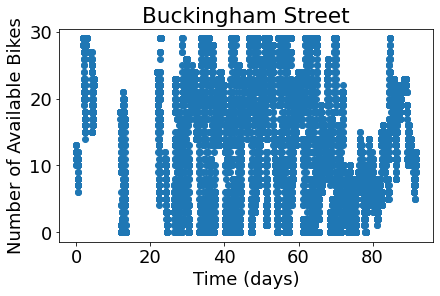

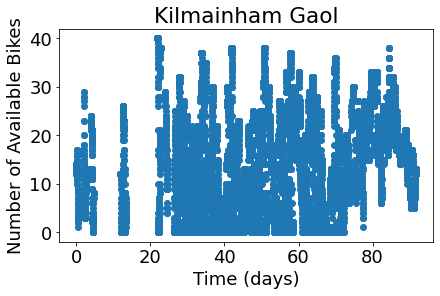

In [8]:
plt.figure('Buckingham')
plt.scatter(df1['T'], df1['AVAILABLE BIKES'])
plt.title("Buckingham Street")
plt.xlabel("Time (days)")
plt.ylabel("Number of Available Bikes")
# pylab.xlim(27, 90)

plt.figure('Kilmainham')
plt.scatter(df2['T'], df2['AVAILABLE BIKES'])
plt.title("Kilmainham Gaol")
plt.xlabel("Time (days)")
plt.ylabel("Number of Available Bikes")
# pylab.xlim(0, 90)

## Interpolate for missing data
https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea

In [6]:
df = df1.copy()
# df['datetime'] = pd.to_datetime(df['TIME'])
df.index = df['TIME']
# del df['datetime']

df = df.resample('D').mean()

In [7]:
df

,AVAILABLE BIKES,T,WEEKDAY
TIME,,,
2020-01-01,10.431138,0.288200,2.0
2020-01-02,NaN,NaN,NaN
2020-01-03,24.442509,2.232639,4.0
2020-01-04,29.000000,2.767362,5.0
2020-01-05,21.000000,4.364584,6.0
...,...,...,...
2020-03-28,19.892361,87.230908,5.0
2020-03-29,21.618056,88.230910,6.0
2020-03-30,17.295139,89.230904,0.0
